In [1]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np

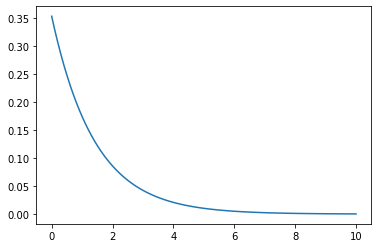

In [2]:
def analytical_solution(x, L=np.sqrt(2), S_0=0.5, D=1):
    true_flux = (S_0/(2*D)) * L * np.exp(-x/L)
    return true_flux

x = np.linspace(0, 10, 100)
z = analytical_solution(x=x)
plt.plot(x,z)

In [3]:
z[1]

0.32918160216697584

In [7]:
class pinns_nn(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(1,50)
        self.hidden1 = nn.Linear(50,50)
        self.final = nn.Linear(50,1)
        
    def forward(self,x):
        activated1 = torch.tanh(self.input(x))
        activated2 = torch.tanh(self.hidden1(activated1))
        output = self.final(activated2)
        return output

Epochs [1/20000], Total Loss: 0.024051858112


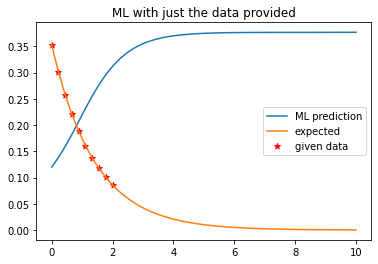

Epochs [1001/20000], Total Loss: 0.000004068304


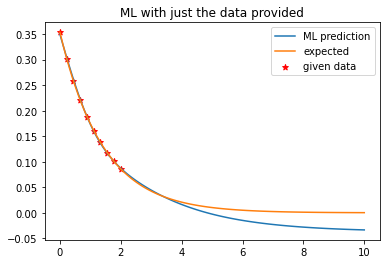

Epochs [2001/20000], Total Loss: 0.000002079232


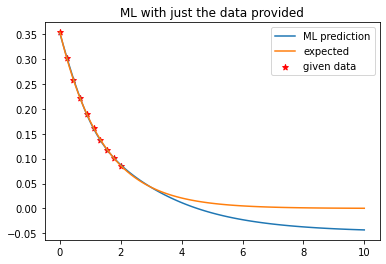

Epochs [3001/20000], Total Loss: 0.000000799835


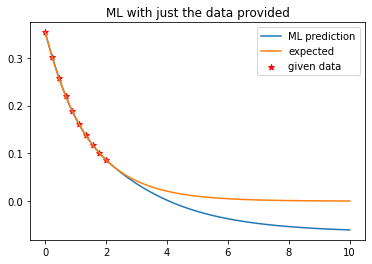

Epochs [4001/20000], Total Loss: 0.000000288759


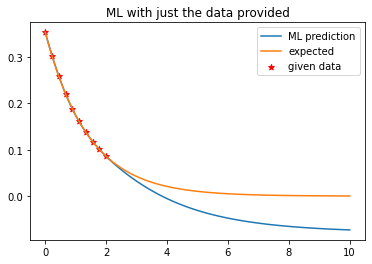

Epochs [5001/20000], Total Loss: 0.000000199366


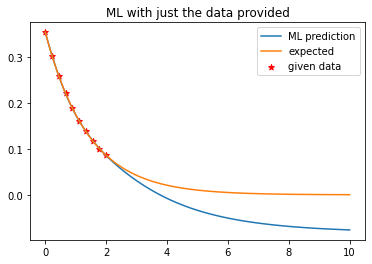

Epochs [6001/20000], Total Loss: 0.000000167507


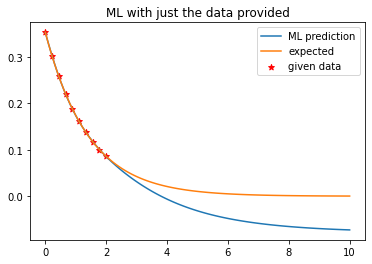

Epochs [7001/20000], Total Loss: 0.000000136341


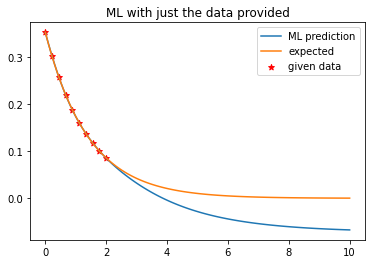

Epochs [8001/20000], Total Loss: 0.000000105248


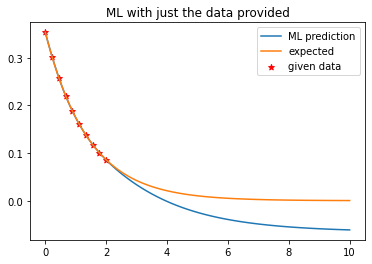

Epochs [9001/20000], Total Loss: 0.000000100710


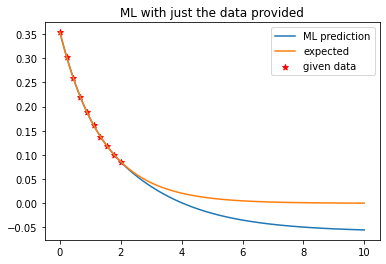

Epochs [10001/20000], Total Loss: 0.000000052563


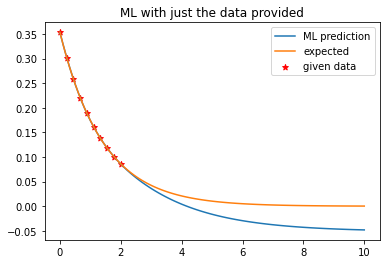

Epochs [11001/20000], Total Loss: 0.000000039925


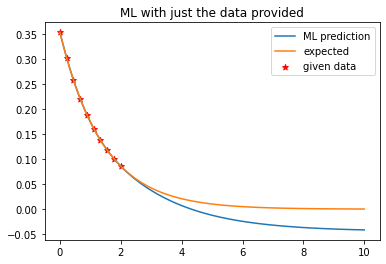

Epochs [12001/20000], Total Loss: 0.000000020345


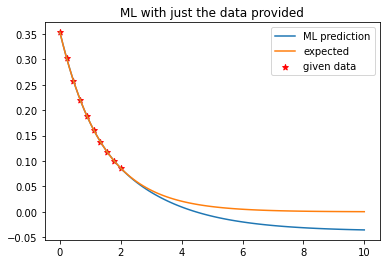

Epochs [13001/20000], Total Loss: 0.000000012490


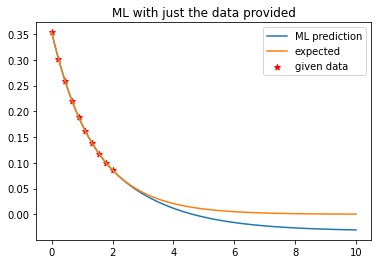

Epochs [14001/20000], Total Loss: 0.000000078873


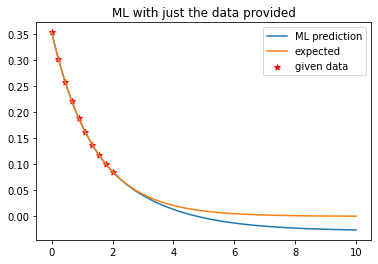

Epochs [15001/20000], Total Loss: 0.000000029147


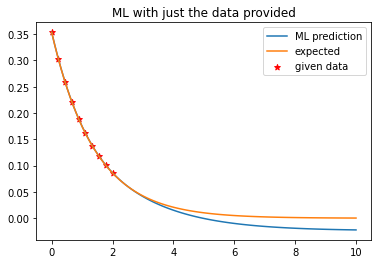

Epochs [16001/20000], Total Loss: 0.000000005312


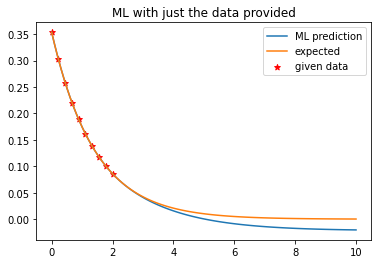

Epochs [17001/20000], Total Loss: 0.000000004039


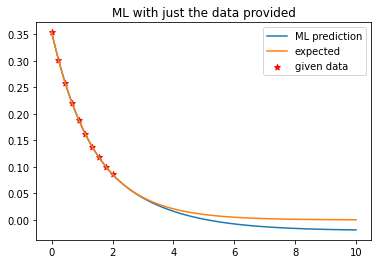

Epochs [18001/20000], Total Loss: 0.000000056459


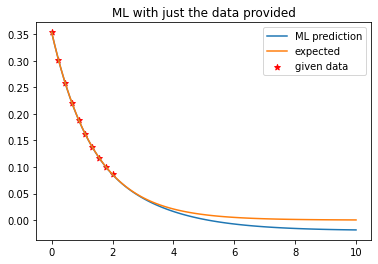

Epochs [19001/20000], Total Loss: 0.000000003503


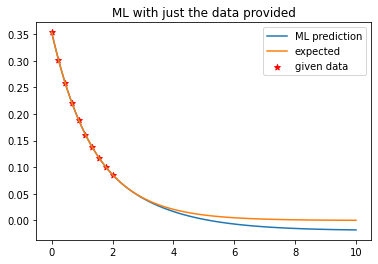

In [11]:
NN = pinns_nn()


optimizer = torch.optim.Adam(NN.parameters(),lr=1e-4)
x_train = torch.linspace(0,2,10).unsqueeze(1)
x_train.requires_grad = True
y_train = analytical_solution(x_train.detach())
y_train.requires_grad = True
epochs = 20000
plot_steps = 1000

loss_fn = nn.MSELoss(reduction='mean')
def loss_func(pred_, true_=None):
    if true_ is None:
        true_ = torch.zeros_like(pred_)
    return loss_fn(pred_,true_)

for i in range(epochs):
    optimizer.zero_grad()
    data_pred = NN(x_train)
    
    

    Data_loss = loss_func(data_pred, y_train)
    
    loss = Data_loss
    loss.backward()
    optimizer.step()
    
    if i % plot_steps == 0:
        print(f'Epochs [{i+1}/{epochs}], Total Loss: {loss.item():.12f}')
        x_test = torch.linspace(0,10,100).unsqueeze(1)
        results = NN(x_test)
        plt.plot(x_test,results.detach(),label='ML prediction')        
        plt.plot(x_test,analytical_solution(x_test),label='expected')
        plt.scatter(x_train.detach(),analytical_solution(x_train.detach()),label='given data',marker='*',color='red')
        plt.legend()
        plt.title('ML with just the data provided')
        plt.show()
        plt.close()

Now Data ML with just the boundary conditions, still NO PDEs (Can just use BC's as data)

Epochs [1/20000], Total Loss: 0.16829711


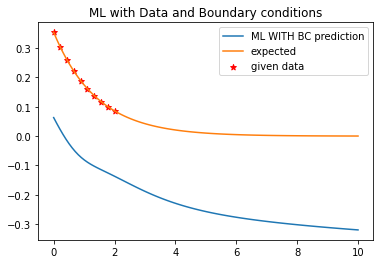

Epochs [1001/20000], Total Loss: 0.00003867


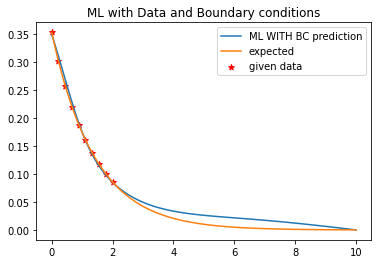

Epochs [2001/20000], Total Loss: 0.00001628


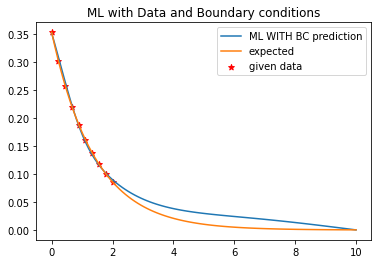

Epochs [3001/20000], Total Loss: 0.00000997


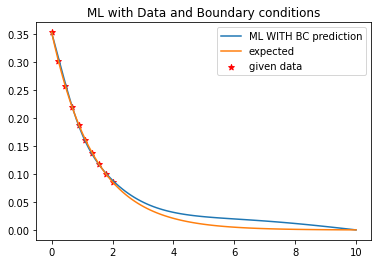

Epochs [4001/20000], Total Loss: 0.00000479


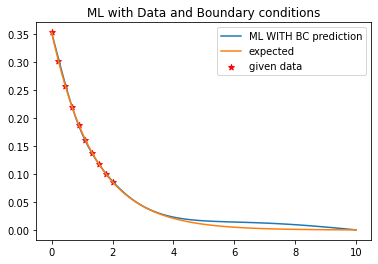

Epochs [5001/20000], Total Loss: 0.00000215


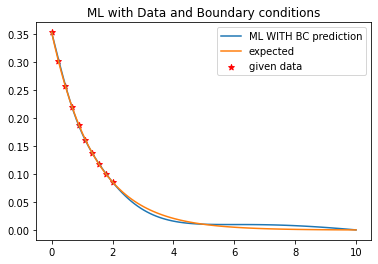

Epochs [6001/20000], Total Loss: 0.00000143


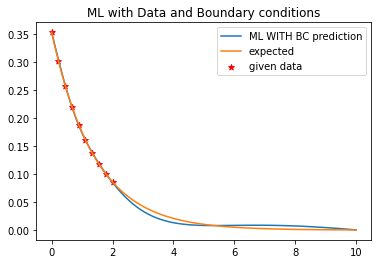

Epochs [7001/20000], Total Loss: 0.00000114


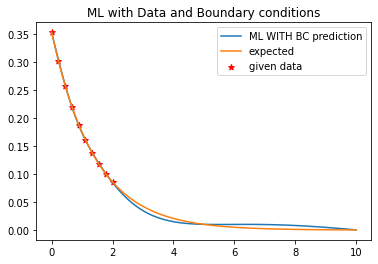

Epochs [8001/20000], Total Loss: 0.00000082


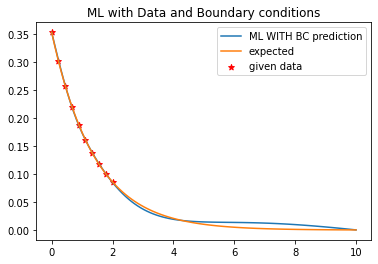

Epochs [9001/20000], Total Loss: 0.00000053


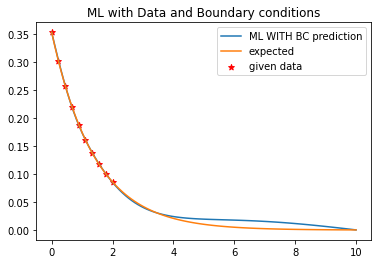

Epochs [10001/20000], Total Loss: 0.00000032


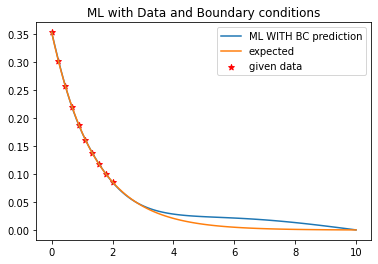

Epochs [11001/20000], Total Loss: 0.00000022


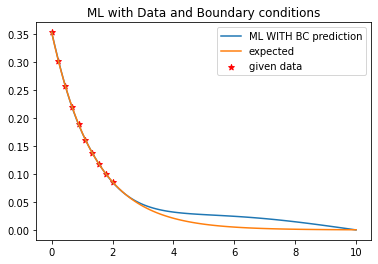

Epochs [12001/20000], Total Loss: 0.00000012


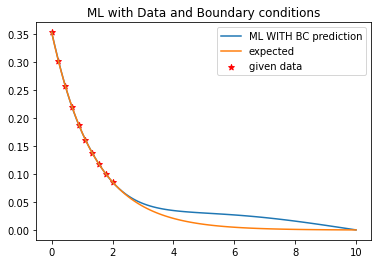

Epochs [13001/20000], Total Loss: 0.00000020


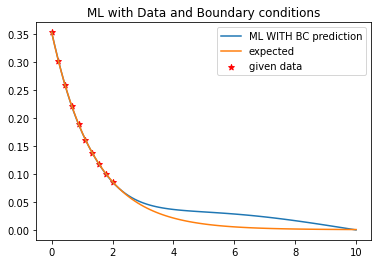

Epochs [14001/20000], Total Loss: 0.00000006


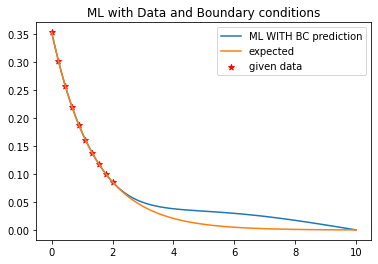

Epochs [15001/20000], Total Loss: 0.00000005


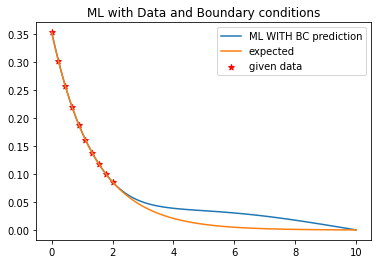

Epochs [16001/20000], Total Loss: 0.00000005


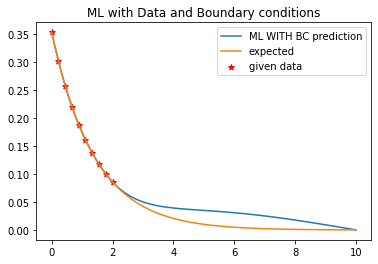

Epochs [17001/20000], Total Loss: 0.00000030


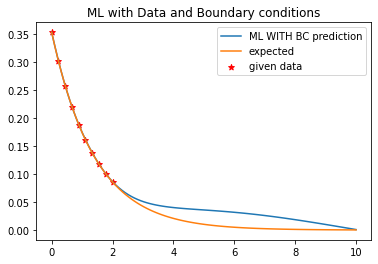

Epochs [18001/20000], Total Loss: 0.00000004


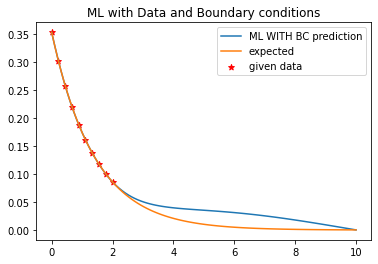

Epochs [19001/20000], Total Loss: 0.00000004


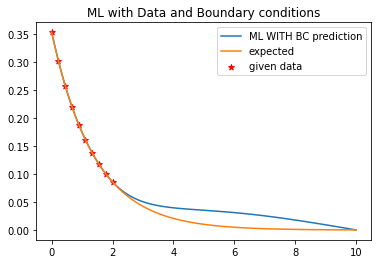

In [93]:
NN = pinns_nn()
optimizer = torch.optim.Adam(NN.parameters(),lr=1e-4)
x_train = torch.linspace(0,2,10).unsqueeze(1)
y_train = analytical_solution(x_train)
epochs = 20000
plot_steps = 1000
for i in range(epochs):
    optimizer.zero_grad()
    data_pred = NN(x_train)
    bc1 = NN(torch.tensor([0.]))
    bc2 = NN(torch.tensor([10.]))
    
    

    Data_loss = torch.mean((data_pred - y_train)**2)
    BC_loss = 0.5*torch.mean((bc1-0.3535533905932738)**2) + 0.5*torch.mean((bc2-0.0003002819826214843)**2)
    
    loss = Data_loss + BC_loss
    loss.backward()
    optimizer.step()
    
    if i % plot_steps == 0:
        print(f'Epochs [{i+1}/{epochs}], Total Loss: {loss.item():.8f}')
        x_test = torch.linspace(0,10,100).unsqueeze(1)
        results = NN(x_test)
        plt.plot(x_test,results.detach(),label='ML WITH BC prediction')        
        plt.plot(x_test,analytical_solution(x_test),label='expected')
        plt.scatter(x_train,analytical_solution(x_train),label='given data',marker='*',color='red')
        plt.legend()
        plt.title('ML with Data and Boundary conditions')
        plt.show()
        plt.close()

Epochs [0/20001], Total Loss: 0.02667037


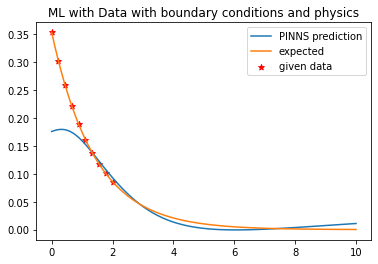

Epochs [1000/20001], Total Loss: 0.00001647


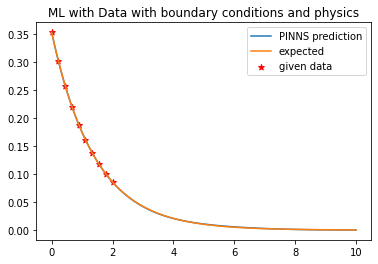

Epochs [2000/20001], Total Loss: 0.00000395


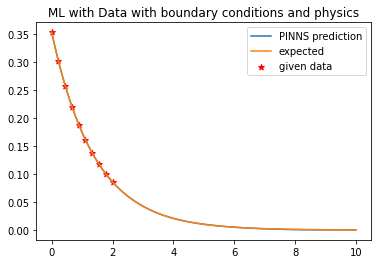

Epochs [3000/20001], Total Loss: 0.00000125


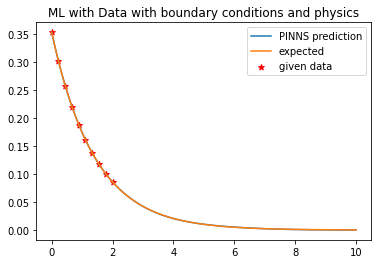

KeyboardInterrupt: 

In [17]:
NN = pinns_nn()
optimizer = torch.optim.Adam(NN.parameters(),lr=1e-4)
x_phy = torch.linspace(0,10,100).unsqueeze(1)
x_phy.requires_grad = True
x_train = torch.linspace(0,2,10).unsqueeze(1)
y_train = analytical_solution(x_train)
loss_fn = nn.MSELoss(reduction='mean')
def loss_func(pred_, true_=None):
    if true_ is None:
        true_ = torch.zeros_like(pred_)
    return loss_fn(pred_,true_)



epochs = 20000
plot_steps = 1000
for i in range(epochs):
    optimizer.zero_grad()
    pinns_pred = NN(x_phy)
    data_pred = NN(x_train)
    bc1 = NN(torch.tensor([0.]))
    bc2 = NN(torch.tensor([10.]))
    
    
    dphi_dx = torch.autograd.grad(pinns_pred.sum(),x_phy,create_graph=True)[0]
    dphi2_dx2 = torch.autograd.grad(dphi_dx.sum(),x_phy,create_graph=True)[0]    
    pde = dphi2_dx2 - 0.5*pinns_pred
    Physics_loss = torch.mean(pde**2)
    Data_loss = torch.mean((data_pred - y_train)**2)
    BC_loss = 0.5*torch.mean((bc1-0.3535533905932738)**2) + 0.5*torch.mean((bc2-0.0003002819826214843)**2)
    
    loss = Data_loss + Physics_loss + BC_loss
    loss.backward()
    optimizer.step()
    
    if i % plot_steps == 0:
        print(f'Epochs [{i}/{epochs+1}], Total Loss: {loss.item():.8f}')
        x_test = torch.linspace(0,10,100).unsqueeze(1)
        results = NN(x_test)
        plt.plot(x_test,results.detach(),label='PINNS prediction')        
        plt.plot(x_test,analytical_solution(x_test),label='expected')
        plt.scatter(x_train,analytical_solution(x_train),label='given data',marker='*',color='red')
        plt.legend()
        plt.title('ML with Data with boundary conditions and physics')
        plt.show()
        plt.close()